# Import library dan Load Data

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

ModuleNotFoundError: No module named 'numpy'

In [2]:
df = pd.read_csv('indonesian-news-title.csv')
df.head(10)

,date,url,title,category
0,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,Kemnaker Awasi TKA di Meikarta,finance
1,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,BNI Digitalkan BNI Java Jazz 2020,finance
2,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,"Terbang ke Australia, Edhy Prabowo Mau Genjot ...",finance
3,02/26/2020,https://finance.detik.com/moneter/d-4916133/oj...,OJK Siapkan Stimulus Ekonomi Antisipasi Dampak...,finance
4,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,Saran Buat Anies-RK yang Mangkir Rapat Banjir ...,finance
5,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,RI Bakal Punya Destinasi Wisata Sejarah Islam ...,finance
6,02/26/2020,https://finance.detik.com/perencanaan-keuangan...,Cara Biar Nggak Tertipu Travel Umrah Abal-abal...,finance
7,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,"DPR Kritik Cara Anies Atasi Banjir, Pesan Kera...",finance
8,02/26/2020,https://finance.detik.com/moneter/d-4916086/ja...,Jadi Korban Gagal Bayar Asuransi? Bisa Mengadu...,finance
9,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,Erick Thohir: BUMN Bukan Badan Usaha Milik Nen...,finance


# EDA dan Prepos Data

In [3]:
df.category.unique()

array(['finance', 'food', 'health', 'hot', 'inet', 'news', 'oto', 'sport',
       'travel'], dtype=object)

In [4]:
#mengambil data dengan topic finance, health dan sport
data=df[df["category"].isin(['finance','health','sport'])]
#drop columns
df = data[['category','title']]
# mengganti nama kolom
df.columns=['topic','title']
df

,topic,title
0,finance,Kemnaker Awasi TKA di Meikarta
1,finance,BNI Digitalkan BNI Java Jazz 2020
2,finance,"Terbang ke Australia, Edhy Prabowo Mau Genjot ..."
3,finance,OJK Siapkan Stimulus Ekonomi Antisipasi Dampak...
4,finance,Saran Buat Anies-RK yang Mangkir Rapat Banjir ...
...,...,...
84546,sport,"Untuk Urusan Gaji, Ter Stegen Belum Bisa Samai..."
84547,sport,Video Stadion Sepakbola di Dunia Beralih Fungs...
84548,sport,"Olimpiade 2020 Ditunda, Hendra Setiawan Berjua..."
84549,sport,"Wimbledon 2020 Terancam Batal, Panitia Rapat D..."


In [5]:
df.tail(10)

,topic,title
84541,sport,"Sempat Khawatir, Herry IP Relaks karena Negati..."
84542,sport,Untung Rugi Penundaan Olimpiade Kata Coach Nag...
84543,sport,Melihat Lagi Saat Nouri Mengalami Kerusakan Ot...
84544,sport,Gaji Messi cs Dipotong Buntut Pandemi Corona
84545,sport,"Hikmah Di Rumah Saja, Herry IP Jadi Lebih Mesr..."
84546,sport,"Untuk Urusan Gaji, Ter Stegen Belum Bisa Samai..."
84547,sport,Video Stadion Sepakbola di Dunia Beralih Fungs...
84548,sport,"Olimpiade 2020 Ditunda, Hendra Setiawan Berjua..."
84549,sport,"Wimbledon 2020 Terancam Batal, Panitia Rapat D..."
84550,sport,"Sempat Bertemu Pangeran Charles, Anthony Joshu..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21523 entries, 0 to 84550
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   topic   21523 non-null  object
 1   title   21523 non-null  object
dtypes: object(2)
memory usage: 504.4+ KB


In [7]:
df1 = df.dropna()

In [8]:
df1

,topic,title
0,finance,Kemnaker Awasi TKA di Meikarta
1,finance,BNI Digitalkan BNI Java Jazz 2020
2,finance,"Terbang ke Australia, Edhy Prabowo Mau Genjot ..."
3,finance,OJK Siapkan Stimulus Ekonomi Antisipasi Dampak...
4,finance,Saran Buat Anies-RK yang Mangkir Rapat Banjir ...
...,...,...
84546,sport,"Untuk Urusan Gaji, Ter Stegen Belum Bisa Samai..."
84547,sport,Video Stadion Sepakbola di Dunia Beralih Fungs...
84548,sport,"Olimpiade 2020 Ditunda, Hendra Setiawan Berjua..."
84549,sport,"Wimbledon 2020 Terancam Batal, Panitia Rapat D..."


In [9]:
#convert to lowercase, strip and remove punctuations
def preprocess(text):
    text = text.lower()
    text=text.strip()
    text=re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub(r'\[[0-9]*\]',' ',text)
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text)
    text = re.sub(r'\s+',' ',text)
    return text


# STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)

#LEMMATIZATION
# Initialize the lemmatizer
wl = WordNetLemmatizer()

# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

In [10]:
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))
df['clean_text'] = df1['title'].apply(lambda x: finalpreprocess(x))
df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3676\1583990761.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = df1['title'].apply(lambda x: finalpreprocess(x))


,topic,title,clean_text
0,finance,Kemnaker Awasi TKA di Meikarta,kemnaker awasi tka di meikarta
1,finance,BNI Digitalkan BNI Java Jazz 2020,bni digitalkan bni java jazz
2,finance,"Terbang ke Australia, Edhy Prabowo Mau Genjot ...",terbang ke australia edhy prabowo mau genjot b...
3,finance,OJK Siapkan Stimulus Ekonomi Antisipasi Dampak...,ojk siapkan stimulus ekonomi antisipasi dampak...
4,finance,Saran Buat Anies-RK yang Mangkir Rapat Banjir ...,saran buat anies rk yang mangkir rapat banjir ...


# Model

In [11]:
# Memisahkan data dan label
texts = df['clean_text'].values
labels = df['topic'].values

# Membagi data menjadi train dan test
train_texts, test_texts, train_labels, test_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)

In [12]:
# Tokenisasi teks
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_texts)

train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

# Padding sequences
max_length = 200
train_padded = pad_sequences(train_sequences, maxlen=max_length)
test_padded = pad_sequences(test_sequences, maxlen=max_length)

In [13]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Mengubah label menjadi angka
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

# Mengubah label menjadi one-hot encoding
train_labels_categorical = to_categorical(train_labels_encoded)
test_labels_categorical = to_categorical(test_labels_encoded)


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Membangun model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_length))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

# Kompilasi model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 200, 64)           49408     
                                                                 
 dropout (Dropout)           (None, 200, 64)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 1362627 (5.20 MB)
Trainable params: 136262

In [15]:
# Melatih model
history = model.fit(train_padded, train_labels_categorical, epochs=10, batch_size=128, validation_split=0.1)

Epoch 1/10
122/122 [==============================] - 60s 472ms/step - loss: 0.5105 - accuracy: 0.7991 - val_loss: 0.1466 - val_accuracy: 0.9518
Epoch 2/10
122/122 [==============================] - 58s 472ms/step - loss: 0.0903 - accuracy: 0.9713 - val_loss: 0.1201 - val_accuracy: 0.9617
Epoch 3/10
122/122 [==============================] - 62s 505ms/step - loss: 0.0342 - accuracy: 0.9903 - val_loss: 0.1285 - val_accuracy: 0.9570
Epoch 4/10
122/122 [==============================] - 59s 485ms/step - loss: 0.0194 - accuracy: 0.9946 - val_loss: 0.1562 - val_accuracy: 0.9617
Epoch 5/10
122/122 [==============================] - 53s 434ms/step - loss: 0.0138 - accuracy: 0.9955 - val_loss: 0.1521 - val_accuracy: 0.9582
Epoch 6/10
122/122 [==============================] - 54s 444ms/step - loss: 0.0176 - accuracy: 0.9947 - val_loss: 0.1924 - val_accuracy: 0.9570
Epoch 7/10
122/122 [==============================] - 58s 476ms/step - loss: 0.0061 - accuracy: 0.9986 - val_loss: 0.1988 - val_ac

In [16]:
# Evaluasi model
loss, accuracy = model.evaluate(test_padded, test_labels_categorical)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# Prediksi pada data pengujian
predictions = model.predict(test_padded)
predictions_labels = np.argmax(predictions, axis=1)
test_labels_labels = np.argmax(test_labels_categorical, axis=1)

135/135 [==============================] - 4s 29ms/step - loss: 0.2470 - accuracy: 0.9573
Test Loss: 0.2470293641090393
Test Accuracy: 0.9572589993476868
135/135 [==============================] - 4s 28ms/step


In [18]:
# Classification report
report = classification_report(test_labels_labels, predictions_labels, target_names=label_encoder.classes_)
print(report)

              precision    recall  f1-score   support

     finance       0.96      0.98      0.97      2862
      health       0.93      0.91      0.92       963
       sport       0.96      0.90      0.93       480

    accuracy                           0.96      4305
   macro avg       0.95      0.93      0.94      4305
weighted avg       0.96      0.96      0.96      4305



# Deteksi teks

In [24]:
# Fungsi untuk memprediksi kategori dari teks baru
def predict_topic(text, model, tokenizer, label_encoder, max_length):
    # Tokenisasi teks
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_length)
    # Prediksi
    prediction = model.predict(padded_sequence)
    predicted_label = label_encoder.inverse_transform([prediction.argmax()])
    return predicted_label[0]

In [1]:
#masukkan teks disini
new_text = 'Indonesia dan Irak sudah menjalani empat pertandingan di Kualifikasi Piala Dunia 2026. Hasilnya, tim asuhan Jesus Casas mampu selalu menang hingga mengumpulkan 12 poin, Indonesia mencatatkan tujuh poin hasil dari empat kali bertanding. Baca artikel sepakbola,Pertahanan Kukuh Irak Tantangan Berat buat Indonesia'

In [2]:
# deteksi topik teks
predicted_topic = predict_topic(new_text, model, tokenizer, label_encoder, max_length)
print(f'Predicted Topic: {predicted_topic}')

NameError: name 'predict_topic' is not defined

# Plot

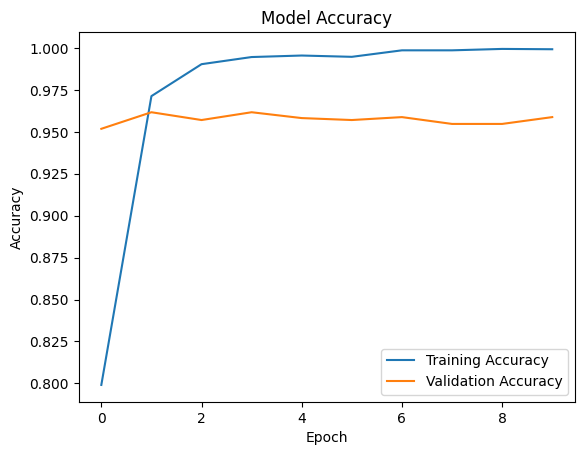

In [22]:
# Membuat plot akurasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

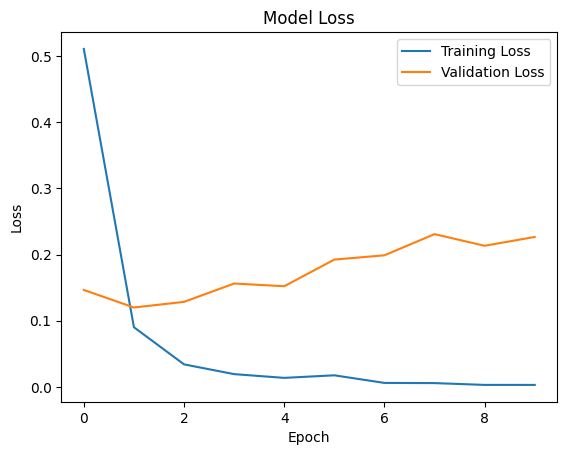

In [23]:
# Membuat plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()